# Shallow Network (2_1_3)
This notebook aims to help get a better understanding of a shallow neural network by defining and plotting a shallow neural network with two inputs, one output, and three hidden units.

### Import 
Import the libraries necessary to define and plot the functions

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Define Plotting Function 
Define the function to plot the resulting 2D function (draw_2D_function) for the shallow neural network (2_1_3)

In [8]:
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

### Define the Rectified Linear Unit (ReLU) Function 
Define the rectified linear unit function as a function that takes preactivation as its input and outputs the activation value.

In [9]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

## Shallow Neural Network (2_1_3)
The shallow neural network in this notebook is a neural network with two inputs, one output, and three hidden units

### Define Shallow Neural Network 
Define the function (shallow_2_1_3) as a shallow neural network with two inputs, one output, and three hidden units.

In [10]:
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # Define the pre activations
  pre_1 = theta_10 + theta_11*x1 + theta_12*x2
  pre_2 = theta_20 + theta_21*x1 + theta_22*x2
  pre_3 = theta_30 + theta_31*x1 + theta_32*x2

  # Pass these through the ReLU function to compute the activation
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Weight the activations using phi1, phi2 and phi3
  w_act_1 = act_1*phi_1
  w_act_2 = act_2*phi_2
  w_act_3 = act_3*phi_3

  # Combine the weights and an offset (phi0) to compute the output
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

### Define Shallow Network Plotting Function 
Define the function (plot_neural_2_inputs) to plot all the intermediates (preactivation, activation, weighted act) for the shallow neural network with 2 inputs and 1 output.

In [11]:
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):

  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)

  # Function to plot all the pre activations
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')

  # Function to plot all the activation
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')

  # Function to plot all the weighted acts
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  # Function to plot the output (y) as a 2D Function
  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, y')
  ax.set_aspect(1.0)
  plt.show()

### Define Parameters of the 1st Shallow Neural Network

In [12]:
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5

### Define Input Values 
Define input values (x1, x2) as an array from 0 to 10 with increments of 0.1 between each value. Use meshgrid to combine the input values (x1, x2) to get every single combination of x1 and x3

In [13]:
x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2) 

### Compute the 1st Shallow Neural Network
Compute the 1st shallow neural network with the given input vaues and parameters.

In [15]:
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)

### Plot the 1st Shallow Neuural Network

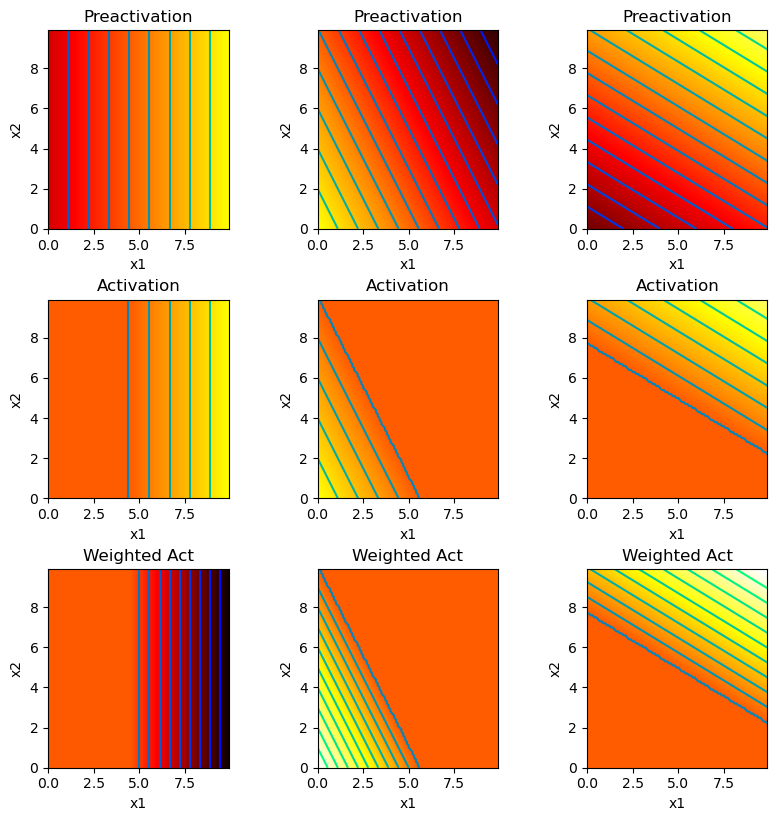

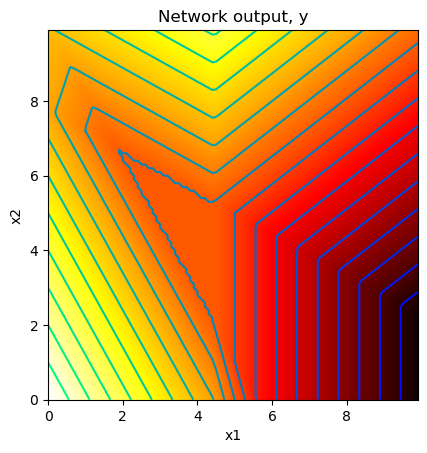

In [16]:
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)